In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

Mean green width: 0.00393
Mean pink width: 0.00432
Mean blue width: 0.00533
Mean white width: 0.01319
Mean black width: 0.01771
Mean grey width: 0.01295


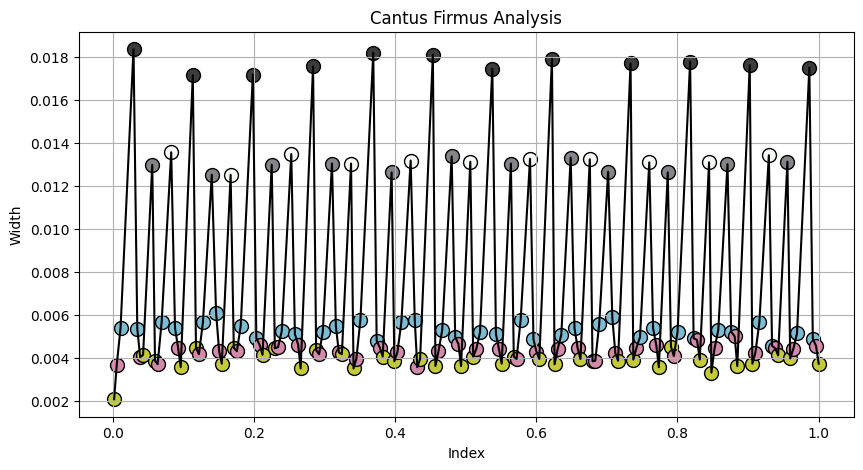

In [8]:
# Load Data
file_path = "op_art_analysis.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Cantus Firmus")

# Plot line graph
plt.figure(figsize=(10, 5))
plt.plot(df['x'], df['Width'], linestyle='-', color='black')  # Line in black

if 'Colour' not in df.columns or 'Width' not in df.columns:
    raise ValueError("Ensure the Excel file has 'colour' and 'Width' columns.")

colour_hex = {'green': '#c4cb3aff', 'pink': '#d38aaaff', 'blue': '#7dbbd3ff', 'white': '#f5f9f4ff', 'black': '#3c3c3cff', 'grey': '#858589ff'}
widths = {'green':[], 'pink':[], 'blue':[], 'white':[], 'black':[], 'grey':[]}

# Apply colors to data points
for (x, width, colour) in zip(df['x'], df['Width'], df['Colour']):
    hex_val = colour_hex[colour]
    widths[colour].append(width)
    plt.scatter(x, width, color=hex_val, edgecolors='black', s=100)  # s controls size

widths['green'] = widths['green'][1:]
for colour in ['green', 'pink', 'blue', 'white', 'black', 'grey']:
    print(f"Mean {colour} width: {np.round(np.mean(widths[colour]), 5)}")


# Labels and grid
plt.xlabel("Index")
plt.ylabel("Width")
plt.title("Cantus Firmus Analysis")
plt.grid(True)

# Show the plot
plt.show()

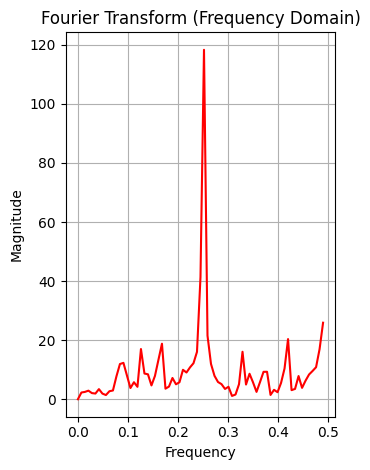

In [ ]:
# Extract signal (Width values)
widths = df['Width']
y = widths - np.mean(widths)
N = len(y)  # Number of data points
T = 1  # Assume unit time steps (adjust if you have actual time intervals)

# Apply Fourier Transform
fft_values = np.fft.fft(y)
frequencies = np.fft.fftfreq(N, T)  # Get frequency bins

# Plot Fourier Transform (Magnitude Spectrum)
plt.subplot(1, 2, 2)
plt.plot(frequencies[:N//2], np.abs(fft_values[:N//2]), color='red')  # Only positive frequencies
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Fourier Transform (Frequency Domain)")
plt.grid(True)

plt.tight_layout()
plt.show()